In [6]:
# import numpy and pandas
import numpy as np
import pandas
import pandas as pd


import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
import math


In [7]:
data = pd.read_csv('human_trafficking.csv')
data

C:\Users\sanch\AppData\Local\Temp\ipykernel_21608\1119502492.py:1: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('human_trafficking.csv')


,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48797,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48798,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48799,2019,Case Management,Female,-99,-99,Minor,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99


In [8]:
data.shape

(48801, 63)

In [9]:
data.dtypes

yearOfRegistration                   int64
Datasource                          object
gender                              object
ageBroad                            object
majorityStatus                      object
                                     ...  
recruiterRelationIntimatePartner     int64
recruiterRelationFriend              int64
recruiterRelationFamily              int64
recruiterRelationOther               int64
recruiterRelationUnknown             int64
Length: 63, dtype: object

In [10]:
data.isna().sum()

yearOfRegistration                  0
Datasource                          0
gender                              0
ageBroad                            0
majorityStatus                      0
                                   ..
recruiterRelationIntimatePartner    0
recruiterRelationFriend             0
recruiterRelationFamily             0
recruiterRelationOther              0
recruiterRelationUnknown            0
Length: 63, dtype: int64

In [11]:
data.isnull().sum()

yearOfRegistration                  0
Datasource                          0
gender                              0
ageBroad                            0
majorityStatus                      0
                                   ..
recruiterRelationIntimatePartner    0
recruiterRelationFriend             0
recruiterRelationFamily             0
recruiterRelationOther              0
recruiterRelationUnknown            0
Length: 63, dtype: int64

In [12]:
data.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [13]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

data

,yearofregistration,datasource,gender,agebroad,majoritystatus,majoritystatusatexploit,majorityentry,citizenship,meansofcontroldebtbondage,meansofcontroltakesearnings,...,typeofsexprivatesexualservices,typeofsexconcatenated,isabduction,recruiterrelationship,countryofexploitation,recruiterrelationintimatepartner,recruiterrelationfriend,recruiterrelationfamily,recruiterrelationother,recruiterrelationunknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48797,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48798,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48799,2019,Case Management,Female,-99,-99,Minor,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   yearofregistration                      48801 non-null  int64 
 1   datasource                              48801 non-null  object
 2   gender                                  48801 non-null  object
 3   agebroad                                48801 non-null  object
 4   majoritystatus                          48801 non-null  object
 5   majoritystatusatexploit                 48801 non-null  object
 6   majorityentry                           48801 non-null  object
 7   citizenship                             48801 non-null  object
 8   meansofcontroldebtbondage               48801 non-null  int64 
 9   meansofcontroltakesearnings             48801 non-null  int64 
 10  meansofcontrolrestrictsfinancialaccess  48801 non-null  int64 
 11  me

In [15]:
data['yearofregistration'].value_counts() 

2016    16399
2017     6508
2018     5818
2015     4276
2014     3000
2013     1832
2005     1455
2006     1423
2007     1417
2012     1367
2011     1340
2002     1026
2010      943
2008      802
2009      587
2003      357
2004      223
2019       28
Name: yearofregistration, dtype: int64

In [16]:
data['gender'].value_counts()

Female    35534
Male      13267
Name: gender, dtype: int64

In [17]:
data['agebroad'].value_counts() 

-99       12362
9--17      8645
30--38     7091
18--20     4448
21--23     4213
24--26     3464
39--47     2821
27--29     2641
48+        1560
0--8       1556
Name: agebroad, dtype: int64

In [18]:
data['majoritystatus'].value_counts()

Adult    26238
-99      12362
Minor    10201
Name: majoritystatus, dtype: int64

In [19]:
data['majorityentry'].value_counts()

-99      42310
Adult     5438
Minor     1053
Name: majorityentry, dtype: int64

In [20]:
data['meansofcontroltakesearnings'].value_counts() 

-99    44804
 1      2776
 0      1221
Name: meansofcontroltakesearnings, dtype: int64

In [21]:
data['majoritystatusatexploit'].value_counts()

-99      39511
Minor     7044
Adult     2246
Name: majoritystatusatexploit, dtype: int64

In [22]:
data['meansofcontroldebtbondage'].value_counts()

-99    46305
 1      1281
 0      1215
Name: meansofcontroldebtbondage, dtype: int64

In [23]:
data['citizenship'].value_counts()

PH     11365
00      8858
UA      7761
MD      5901
US      3636
KH      1979
ID      1971
BY      1463
MM      1250
RO       655
GH       544
KG       437
BG       342
HT       339
-99      278
UZ       261
VN       170
GW       145
LA       126
CO       124
NG       108
UG        98
AF        97
MG        94
LK        85
SL        81
SN        70
TH        55
KZ        54
CD        53
ML        45
TJ        43
BF        33
KE        32
NE        31
CI        31
NP        27
TM        26
CN        23
AL        22
MX        19
BO        18
GN        15
ER        13
KR        12
BD        11
Name: citizenship, dtype: int64

In [24]:
data['meansofcontrolrestrictsfinancialaccess'].value_counts()

-99    48548
 0       137
 1       116
Name: meansofcontrolrestrictsfinancialaccess, dtype: int64

In [25]:
data['meansofcontrolthreats'].value_counts() 

-99    43637
 1      3972
 0      1192
Name: meansofcontrolthreats, dtype: int64

In [26]:
data['meansofcontrolpsychologicalabuse'].value_counts() 

-99    42745
 1      4845
 0      1211
Name: meansofcontrolpsychologicalabuse, dtype: int64

In [27]:
data['meansofcontrolfalsepromises'].value_counts() 

-99    44961
 1      2756
 0      1084
Name: meansofcontrolfalsepromises, dtype: int64

In [28]:
data['meansofcontrolphysicalabuse'].value_counts() 

-99    43952
 1      3632
 0      1217
Name: meansofcontrolphysicalabuse, dtype: int64

In [29]:
data['meansofcontrolsexualabuse'].value_counts() 

-99    45980
 1      1594
 0      1227
Name: meansofcontrolsexualabuse, dtype: int64

In [30]:
data['meansofcontrolpsychoactivesubstances'].value_counts() 

-99    45292
 1      2282
 0      1227
Name: meansofcontrolpsychoactivesubstances, dtype: int64

In [31]:
data['meansofcontrolrestrictsmovement'].value_counts() 

-99    43181
 1      4415
 0      1205
Name: meansofcontrolrestrictsmovement, dtype: int64

In [32]:
data['meansofcontrolrestrictsmedicalcare'].value_counts() 

-99    46302
 1      1283
 0      1216
Name: meansofcontrolrestrictsmedicalcare, dtype: int64

In [33]:
data['meansofcontrolexcessiveworkinghours'].value_counts() 

-99    45484
 1      2157
 0      1160
Name: meansofcontrolexcessiveworkinghours, dtype: int64

In [34]:
data['meansofcontroluseschildren'].value_counts()

-99    48650
 1       120
 0        31
Name: meansofcontroluseschildren, dtype: int64

In [35]:
data['meansofcontrolthreatoflawenforcement'].value_counts() 

-99    46793
 0      1229
 1       779
Name: meansofcontrolthreatoflawenforcement, dtype: int64

In [36]:
data['meansofcontrolwithholdsnecessities'].value_counts() 

-99    46217
 1      1369
 0      1215
Name: meansofcontrolwithholdsnecessities, dtype: int64

In [37]:
data['meansofcontrolwithholdsdocuments'].value_counts()

-99    45527
 1      2076
 0      1198
Name: meansofcontrolwithholdsdocuments, dtype: int64

In [38]:
data['meansofcontrolother'].value_counts() 

-99    45701
 1      1873
 0      1227
Name: meansofcontrolother, dtype: int64

In [39]:
data['meansofcontrolother'].value_counts()

-99    45701
 1      1873
 0      1227
Name: meansofcontrolother, dtype: int64

In [40]:
data['meansofcontrolnotspecified'].value_counts() 

 1     26620
-99    11944
 0     10237
Name: meansofcontrolnotspecified, dtype: int64

In [41]:
data['meansofcontrolconcatenated'].value_counts()

-99                                                                                                     32281
Not specified                                                                                            6128
Psychological abuse                                                                                       762
Restricts movement                                                                                        504
Psychoactive substances                                                                                   455
                                                                                                        ...  
Takes earnings;Threats;Restricts movement;Excessive working hours                                           1
Threats;Psychological abuse;Physical abuse;Sexual abuse;Restricts medical care;Withholds necessities        1
Takes earnings;False promises;Withholds necessities                                                         1
Debt bonda

In [42]:
data['isforcedlabour'].value_counts() 

-99    22699
 0     16330
 1      9772
Name: isforcedlabour, dtype: int64

In [43]:
data['issexualexploit'].value_counts()  

-99    24940
 1     16067
 0      7794
Name: issexualexploit, dtype: int64

In [44]:
data['isotherexploit'].value_counts() 

 0     23874
-99    17863
 1      7064
Name: isotherexploit, dtype: int64

In [45]:
data['issexandlabour'].value_counts() 

-99    25345
 0     23378
 1        78
Name: issexandlabour, dtype: int64

In [46]:
data['isforcedmarriage'].value_counts() 

-99    37775
 0     10858
 1       168
Name: isforcedmarriage, dtype: int64

In [47]:
data['isforcedmilitary'].value_counts()

-99    37351
 0     11450
Name: isforcedmilitary, dtype: int64

In [48]:
data['isorganremoval'].value_counts()

-99    37351
 0     11450
Name: isorganremoval, dtype: int64

In [49]:
data['isslaveryandpractices'].value_counts()

-99    47213
 0      1229
 1       359
Name: isslaveryandpractices, dtype: int64

In [50]:
data['typeofexploitconcatenated'].value_counts()

-99                                                                          16174
Sexual exploitation                                                          15989
Forced labour                                                                 8969
Other                                                                         7063
Slavery and similar practices                                                  359
Forced marriage                                                                168
Forced labour;Sexual exploitation;Combined sexual and labour exploitation       78
Forced labour;Other                                                              1
Name: typeofexploitconcatenated, dtype: int64

In [51]:
data['typeoflabouragriculture'].value_counts() 

-99    28329
 0     20320
 1       152
Name: typeoflabouragriculture, dtype: int64

In [52]:
data['typeoflabouraquafarming'].value_counts() 

-99    28368
 0     20326
 1       107
Name: typeoflabouraquafarming, dtype: int64

In [53]:
data['typeoflabourbegging'].value_counts() 

-99    28381
 0     20271
 1       149
Name: typeoflabourbegging, dtype: int64

In [54]:
data['typeoflabourconstruction'].value_counts() 

-99    28001
 0     19546
 1      1254
Name: typeoflabourconstruction, dtype: int64

In [55]:
data['typeoflabourdomesticwork'].value_counts() 

-99    26250
 0     19807
 1      2744
Name: typeoflabourdomesticwork, dtype: int64

In [56]:
data['typeoflabourhospitality'].value_counts()

-99    27120
 0     21599
 1        82
Name: typeoflabourhospitality, dtype: int64

In [57]:
data['typeoflabourillicitactivities'].value_counts()

-99    28459
 0     20342
Name: typeoflabourillicitactivities, dtype: int64

In [58]:
data['typeoflabourmanufacturing'].value_counts() 

-99    28256
 0     20092
 1       453
Name: typeoflabourmanufacturing, dtype: int64

In [59]:
data['typeoflabourminingordrilling'].value_counts()

-99    28381
 0     20420
Name: typeoflabourminingordrilling, dtype: int64

In [60]:
data['typeoflabourpeddling'].value_counts() 

-99    28459
 0     20270
 1        72
Name: typeoflabourpeddling, dtype: int64

In [61]:
data['typeoflabourtransportation'].value_counts()

-99    28381
 0     20420
Name: typeoflabourtransportation, dtype: int64

In [62]:
data['typeoflabourother'].value_counts() 

-99    27117
 0     21523
 1       161
Name: typeoflabourother, dtype: int64

In [63]:
data['typeoflabournotspecified'].value_counts() 

-99    27179
 0     20451
 1      1171
Name: typeoflabournotspecified, dtype: int64

In [64]:
data['typeoflabourconcatenated'].value_counts()

-99                            42552
Domestic work                   2721
Construction                    1251
Not specified                   1097
Manufacturing                    453
Begging                          149
Agriculture                      149
Aquafarming                      107
Hospitality                       82
Other                             77
Peddling                          72
Other;Not specified               62
Domestic work;Other               22
Construction;Not specified         3
Agriculture;Not specified          3
Domestic work;Not specified        1
Name: typeoflabourconcatenated, dtype: int64

In [65]:
data['typeofsexprostitution'].value_counts() 

-99    30343
 0     14072
 1      4386
Name: typeofsexprostitution, dtype: int64

In [66]:
data['typeofsexpornography'].value_counts() 

-99    42357
 0      6284
 1       160
Name: typeofsexpornography, dtype: int64

In [67]:
data['typeofsexremoteinteractiveservices'].value_counts() 

-99    42357
 0      6444
Name: typeofsexremoteinteractiveservices, dtype: int64

In [68]:
data['typeofsexprivatesexualservices'].value_counts()

-99    43586
 0      5172
 1        43
Name: typeofsexprivatesexualservices, dtype: int64

In [69]:
data['typeofsexconcatenated'].value_counts()

-99                        27828
-99                        16384
Prostitution                4386
Pornography                  160
Private sexual services       43
Name: typeofsexconcatenated, dtype: int64

In [70]:
data['isabduction'].value_counts()

-99    32430
 0     16332
 1        39
Name: isabduction, dtype: int64

In [71]:
data['recruiterrelationship'].value_counts()

-99                                                     30681
Not Specified                                            8730
Other                                                    3859
Friend/Acquaintance                                      1992
Family/Relative                                          1793
Intimate Partner                                         1505
Friend/Acquaintance; Other                                 51
Family/Relative; Intimate Partner                          41
Intimate Partner; Other                                    39
Friend/Acquaintance; Intimate Partner                      28
Not Specified; Other                                       24
Family/Relative; Other                                     18
Family/Relative; Friend/Acquaintance                       16
Family/Relative; Not Specified                              8
Intimate Partner; Not Specified                             6
Friend/Acquaintance; Intimate Partner; Other                4
Family/R

In [72]:
data['countryofexploitation'].value_counts()

US     12512
-99    10175
UA      5399
MD      4504
RU      2738
PH      1988
ID      1777
KH      1000
MY       930
00       844
GH       544
AE       504
BY       400
TH       391
SN       370
BG       356
HT       339
PL       326
SA       278
RO       259
RS       248
QA       239
KZ       222
KW       209
TR       197
MK       194
UZ       193
UG       151
BA       127
JP       111
JO       108
OM        94
MG        94
TT        85
AF        83
SL        81
CN        79
LB        73
TJ        54
IN        46
SY        41
CZ        38
SG        37
ZA        36
TW        33
HK        31
TM        26
BD        26
IT        24
AT        24
AL        22
BH        22
MU        20
AR        18
DK        17
VN        16
EG        13
EC        13
CY        11
LY        11
Name: countryofexploitation, dtype: int64

In [73]:
data['recruiterrelationintimatepartner'].value_counts()  

 0     38369
-99     8807
 1      1625
Name: recruiterrelationintimatepartner, dtype: int64

In [74]:
data['recruiterrelationfriend'].value_counts() 

 0     37898
-99     8807
 1      2096
Name: recruiterrelationfriend, dtype: int64

In [75]:
data['recruiterrelationfamily'].value_counts() 

 0     38115
-99     8807
 1      1879
Name: recruiterrelationfamily, dtype: int64

In [76]:
data['recruiterrelationother'].value_counts() 

 0     35514
-99     8807
 1      4480
Name: recruiterrelationother, dtype: int64

In [77]:
data['recruiterrelationunknown'].value_counts() 

 1     39207
 0      9517
-99       77
Name: recruiterrelationunknown, dtype: int64

In [78]:
columns_to_drop = [
    'isforcedlabour', 'isslaveryandpractices', 'majoritystatusatexploit',
    'isforcedmilitary', 'issexualexploit', 'isotherexploit', 'issexandlabour',
    'isforcedmarriage', 'typeoflabournotspecified', 'typeoflabourother',
    'typeoflabourpeddling', 'typeoflabourmanufacturing', 'typeoflabourhospitality',
    'typeoflabourdomesticwork', 'typeoflabourconstruction', 'typeoflabourbegging',
    'typeoflabouraquafarming', 'typeoflabourillicitactivities', 'typeoflabourminingordrilling',
    'typeoflabouragriculture', 'recruiterrelationintimatepartner', 'recruiterrelationfriend',
    'recruiterrelationfamily', 'recruiterrelationother', 'typeofsexprivatesexualservices',
    'typeofsexremoteinteractiveservices', 'typeoflabourtransportation', 'typeofsexpornography',
    'typeofsexprostitution','datasource'
]

data = data.drop(columns=columns_to_drop)


In [79]:
data.replace('-99','unknown', inplace=True)
data.replace(-99, 'unknown', inplace=True)

In [80]:
data

,yearofregistration,gender,agebroad,majoritystatus,majorityentry,citizenship,meansofcontroldebtbondage,meansofcontroltakesearnings,meansofcontrolrestrictsfinancialaccess,meansofcontrolthreats,...,meansofcontrolnotspecified,meansofcontrolconcatenated,isorganremoval,typeofexploitconcatenated,typeoflabourconcatenated,typeofsexconcatenated,isabduction,recruiterrelationship,countryofexploitation,recruiterrelationunknown
0,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
1,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
2,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
3,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
4,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown
48797,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown
48798,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown
48799,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown


In [81]:
data['yearofregistration']=data['yearofregistration'].astype(object)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   yearofregistration                      48801 non-null  object
 1   gender                                  48801 non-null  object
 2   agebroad                                48801 non-null  object
 3   majoritystatus                          48801 non-null  object
 4   majorityentry                           48801 non-null  object
 5   citizenship                             48801 non-null  object
 6   meansofcontroldebtbondage               48801 non-null  object
 7   meansofcontroltakesearnings             48801 non-null  object
 8   meansofcontrolrestrictsfinancialaccess  48801 non-null  object
 9   meansofcontrolthreats                   48801 non-null  object
 10  meansofcontrolpsychologicalabuse        48801 non-null  object
 11  me

In [83]:
data=data.astype(str)

In [84]:
data.isna().sum().sum()

0

In [85]:
col_uni_val={}
for i in data.columns:
    col_uni_val[i] = len(data[i].unique())

#Import pprint to display dic nicely:
import pprint
pprint.pprint(col_uni_val)

{'agebroad': 10,
 'citizenship': 46,
 'countryofexploitation': 60,
 'gender': 2,
 'isabduction': 3,
 'isorganremoval': 2,
 'majorityentry': 3,
 'majoritystatus': 3,
 'meansofcontrolconcatenated': 1862,
 'meansofcontroldebtbondage': 3,
 'meansofcontrolexcessiveworkinghours': 3,
 'meansofcontrolfalsepromises': 3,
 'meansofcontrolnotspecified': 3,
 'meansofcontrolother': 3,
 'meansofcontrolphysicalabuse': 3,
 'meansofcontrolpsychoactivesubstances': 3,
 'meansofcontrolpsychologicalabuse': 3,
 'meansofcontrolrestrictsfinancialaccess': 3,
 'meansofcontrolrestrictsmedicalcare': 3,
 'meansofcontrolrestrictsmovement': 3,
 'meansofcontrolsexualabuse': 3,
 'meansofcontroltakesearnings': 3,
 'meansofcontrolthreatoflawenforcement': 3,
 'meansofcontrolthreats': 3,
 'meansofcontroluseschildren': 3,
 'meansofcontrolwithholdsdocuments': 3,
 'meansofcontrolwithholdsnecessities': 3,
 'recruiterrelationship': 21,
 'recruiterrelationunknown': 3,
 'typeofexploitconcatenated': 8,
 'typeoflabourconcatenated':

In [86]:
unique_counts = data['agebroad'].value_counts()
unique_counts

unknown    12362
9--17       8645
30--38      7091
18--20      4448
21--23      4213
24--26      3464
39--47      2821
27--29      2641
48+         1560
0--8        1556
Name: agebroad, dtype: int64

In [87]:
unique_counts = data['citizenship'].value_counts()
unique_counts

PH         11365
00          8858
UA          7761
MD          5901
US          3636
KH          1979
ID          1971
BY          1463
MM          1250
RO           655
GH           544
KG           437
BG           342
HT           339
unknown      278
UZ           261
VN           170
GW           145
LA           126
CO           124
NG           108
UG            98
AF            97
MG            94
LK            85
SL            81
SN            70
TH            55
KZ            54
CD            53
ML            45
TJ            43
BF            33
KE            32
NE            31
CI            31
NP            27
TM            26
CN            23
AL            22
MX            19
BO            18
GN            15
ER            13
KR            12
BD            11
Name: citizenship, dtype: int64

In [88]:
unique_counts = data['countryofexploitation'].value_counts()
unique_counts

US         12512
unknown    10175
UA          5399
MD          4504
RU          2738
PH          1988
ID          1777
KH          1000
MY           930
00           844
GH           544
AE           504
BY           400
TH           391
SN           370
BG           356
HT           339
PL           326
SA           278
RO           259
RS           248
QA           239
KZ           222
KW           209
TR           197
MK           194
UZ           193
UG           151
BA           127
JP           111
JO           108
OM            94
MG            94
TT            85
AF            83
SL            81
CN            79
LB            73
TJ            54
IN            46
SY            41
CZ            38
SG            37
ZA            36
TW            33
HK            31
TM            26
BD            26
IT            24
AT            24
AL            22
BH            22
MU            20
AR            18
DK            17
VN            16
EG            13
EC            13
CY            

In [89]:
unique_counts = data['gender'].value_counts()
unique_counts

Female    35534
Male      13267
Name: gender, dtype: int64

In [90]:
unique_counts = data['isabduction'].value_counts()
unique_counts

unknown    32430
0          16332
1             39
Name: isabduction, dtype: int64

In [91]:
unique_counts = data['isorganremoval'].value_counts()
unique_counts

unknown    37351
0          11450
Name: isorganremoval, dtype: int64

In [92]:
unique_counts = data['majorityentry'].value_counts()
unique_counts

unknown    42310
Adult       5438
Minor       1053
Name: majorityentry, dtype: int64

In [93]:
unique_counts = data['majoritystatus'].value_counts()
unique_counts

Adult      26238
unknown    12362
Minor      10201
Name: majoritystatus, dtype: int64

In [94]:
unique_counts = data['meansofcontroldebtbondage'].value_counts()
unique_counts

unknown    46305
1           1281
0           1215
Name: meansofcontroldebtbondage, dtype: int64

In [95]:
unique_counts = data['meansofcontrolexcessiveworkinghours'].value_counts()
unique_counts

unknown    45484
1           2157
0           1160
Name: meansofcontrolexcessiveworkinghours, dtype: int64

In [96]:
unique_counts = data['meansofcontrolexcessiveworkinghours'].value_counts()
unique_counts

unknown    45484
1           2157
0           1160
Name: meansofcontrolexcessiveworkinghours, dtype: int64

In [97]:
unique_counts = data['meansofcontrolfalsepromises'].value_counts()
unique_counts

unknown    44961
1           2756
0           1084
Name: meansofcontrolfalsepromises, dtype: int64

In [98]:
unique_counts = data['meansofcontrolnotspecified'].value_counts()
unique_counts

1          26620
unknown    11944
0          10237
Name: meansofcontrolnotspecified, dtype: int64

In [99]:
unique_counts = data['meansofcontrolother'].value_counts()
unique_counts

unknown    45701
1           1873
0           1227
Name: meansofcontrolother, dtype: int64

In [100]:
unique_counts = data['meansofcontrolphysicalabuse'].value_counts()
unique_counts

unknown    43952
1           3632
0           1217
Name: meansofcontrolphysicalabuse, dtype: int64

In [101]:
unique_counts = data['meansofcontrolpsychoactivesubstances'].value_counts()
unique_counts

unknown    45292
1           2282
0           1227
Name: meansofcontrolpsychoactivesubstances, dtype: int64

In [102]:
unique_counts = data['meansofcontrolpsychologicalabuse'].value_counts()
unique_counts

unknown    42745
1           4845
0           1211
Name: meansofcontrolpsychologicalabuse, dtype: int64

In [103]:
unique_counts = data['meansofcontrolrestrictsfinancialaccess'].value_counts()
unique_counts

unknown    48548
0            137
1            116
Name: meansofcontrolrestrictsfinancialaccess, dtype: int64

In [104]:
unique_counts = data['meansofcontrolrestrictsmedicalcare'].value_counts()
unique_counts

unknown    46302
1           1283
0           1216
Name: meansofcontrolrestrictsmedicalcare, dtype: int64

In [105]:
unique_counts = data['meansofcontrolrestrictsmovement'].value_counts()
unique_counts

unknown    43181
1           4415
0           1205
Name: meansofcontrolrestrictsmovement, dtype: int64

In [106]:
unique_counts = data['meansofcontrolsexualabuse'].value_counts()
unique_counts

unknown    45980
1           1594
0           1227
Name: meansofcontrolsexualabuse, dtype: int64

In [107]:
unique_counts = data['meansofcontroltakesearnings'].value_counts()
unique_counts

unknown    44804
1           2776
0           1221
Name: meansofcontroltakesearnings, dtype: int64

In [108]:
unique_counts = data['meansofcontrolthreatoflawenforcement'].value_counts()
unique_counts

unknown    46793
0           1229
1            779
Name: meansofcontrolthreatoflawenforcement, dtype: int64

In [109]:
unique_counts = data['meansofcontrolthreats'].value_counts()
unique_counts

unknown    43637
1           3972
0           1192
Name: meansofcontrolthreats, dtype: int64

In [110]:
unique_counts = data['meansofcontroluseschildren'].value_counts()
unique_counts

unknown    48650
1            120
0             31
Name: meansofcontroluseschildren, dtype: int64

In [111]:
unique_counts = data['meansofcontrolwithholdsdocuments'].value_counts()
unique_counts

unknown    45527
1           2076
0           1198
Name: meansofcontrolwithholdsdocuments, dtype: int64

In [112]:
unique_counts = data['meansofcontrolwithholdsnecessities'].value_counts()
unique_counts

unknown    46217
1           1369
0           1215
Name: meansofcontrolwithholdsnecessities, dtype: int64

In [113]:
unique_counts = data['recruiterrelationship'].value_counts()
unique_counts

unknown                                                 30681
Not Specified                                            8730
Other                                                    3859
Friend/Acquaintance                                      1992
Family/Relative                                          1793
Intimate Partner                                         1505
Friend/Acquaintance; Other                                 51
Family/Relative; Intimate Partner                          41
Intimate Partner; Other                                    39
Friend/Acquaintance; Intimate Partner                      28
Not Specified; Other                                       24
Family/Relative; Other                                     18
Family/Relative; Friend/Acquaintance                       16
Family/Relative; Not Specified                              8
Intimate Partner; Not Specified                             6
Friend/Acquaintance; Intimate Partner; Other                4
Family/R

In [114]:
split=lambda x: x.split(";")[0]
data['recruiterrelationship']=data['recruiterrelationship'].apply(split)

In [115]:
unique_counts = data['recruiterrelationship'].value_counts()
unique_counts

unknown                30681
Not Specified           8754
Other                   3859
Friend/Acquaintance     2078
Family/Relative         1879
Intimate Partner        1550
Name: recruiterrelationship, dtype: int64

In [116]:
unique_counts = data['recruiterrelationunknown'].value_counts()
unique_counts

1          39207
0           9517
unknown       77
Name: recruiterrelationunknown, dtype: int64

In [117]:
unique_counts = data['typeofexploitconcatenated'].value_counts()
unique_counts

unknown                                                                      16174
Sexual exploitation                                                          15989
Forced labour                                                                 8969
Other                                                                         7063
Slavery and similar practices                                                  359
Forced marriage                                                                168
Forced labour;Sexual exploitation;Combined sexual and labour exploitation       78
Forced labour;Other                                                              1
Name: typeofexploitconcatenated, dtype: int64

In [118]:
split=lambda x: x.split(";")[0]
data['typeofexploitconcatenated']=data['typeofexploitconcatenated'].apply(split)

In [119]:
unique_counts = data['typeofexploitconcatenated'].value_counts()
unique_counts

unknown                          16174
Sexual exploitation              15989
Forced labour                     9048
Other                             7063
Slavery and similar practices      359
Forced marriage                    168
Name: typeofexploitconcatenated, dtype: int64

In [120]:
unique_counts = data['typeofsexconcatenated'].value_counts()
unique_counts

unknown                    44212
Prostitution                4386
Pornography                  160
Private sexual services       43
Name: typeofsexconcatenated, dtype: int64

In [121]:
unique_counts = data['typeoflabourconcatenated'].value_counts()
unique_counts

unknown                        42552
Domestic work                   2721
Construction                    1251
Not specified                   1097
Manufacturing                    453
Begging                          149
Agriculture                      149
Aquafarming                      107
Hospitality                       82
Other                             77
Peddling                          72
Other;Not specified               62
Domestic work;Other               22
Construction;Not specified         3
Agriculture;Not specified          3
Domestic work;Not specified        1
Name: typeoflabourconcatenated, dtype: int64

In [122]:
"Other;Not specified".split(";")[0]

'Other'

In [123]:
split=lambda x: x.split(";")[0]
data['typeoflabourconcatenated']=data['typeoflabourconcatenated'].apply(split)

In [124]:
data['typeoflabourconcatenated'].value_counts()

unknown          42552
Domestic work     2744
Construction      1254
Not specified     1097
Manufacturing      453
Agriculture        152
Begging            149
Other              139
Aquafarming        107
Hospitality         82
Peddling            72
Name: typeoflabourconcatenated, dtype: int64

In [125]:
unique_counts = data['meansofcontrolconcatenated'].value_counts()
unique_counts

unknown                                                                                                 32281
Not specified                                                                                            6128
Psychological abuse                                                                                       762
Restricts movement                                                                                        504
Psychoactive substances                                                                                   455
                                                                                                        ...  
Takes earnings;Threats;Restricts movement;Excessive working hours                                           1
Threats;Psychological abuse;Physical abuse;Sexual abuse;Restricts medical care;Withholds necessities        1
Takes earnings;False promises;Withholds necessities                                                         1
Debt bonda

In [126]:
split=lambda x: x.split(";")[0]
data['meansofcontrolconcatenated']=data['meansofcontrolconcatenated'].apply(split)

In [127]:
data['meansofcontrolconcatenated'].value_counts()

unknown                       32281
Not specified                  6128
Threats                        1841
Psychological abuse            1773
Excessive working hours        1343
Debt bondage                   1299
Takes earnings                  711
Physical abuse                  673
Psychoactive substances         665
Restricts movement              651
False promises                  549
Sexual abuse                    354
Other                           263
Physical Abuse                  130
Restricts financial access       60
Withholds necessities            40
Withholds documents              25
Uses children                     8
Threat of law enforcement         4
Restricts medical care            3
Name: meansofcontrolconcatenated, dtype: int64

In [128]:
unique_counts = data['yearofregistration'].value_counts()
unique_counts

2016    16399
2017     6508
2018     5818
2015     4276
2014     3000
2013     1832
2005     1455
2006     1423
2007     1417
2012     1367
2011     1340
2002     1026
2010      943
2008      802
2009      587
2003      357
2004      223
2019       28
Name: yearofregistration, dtype: int64

In [129]:
data

,yearofregistration,gender,agebroad,majoritystatus,majorityentry,citizenship,meansofcontroldebtbondage,meansofcontroltakesearnings,meansofcontrolrestrictsfinancialaccess,meansofcontrolthreats,...,meansofcontrolnotspecified,meansofcontrolconcatenated,isorganremoval,typeofexploitconcatenated,typeoflabourconcatenated,typeofsexconcatenated,isabduction,recruiterrelationship,countryofexploitation,recruiterrelationunknown
0,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
1,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
2,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
3,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
4,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,1,unknown,0,Sexual exploitation,unknown,unknown,unknown,unknown,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown
48797,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown
48798,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown
48799,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,1,Not specified,0,Sexual exploitation,unknown,unknown,0,unknown,UG,unknown


In [130]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   yearofregistration                      48801 non-null  object
 1   gender                                  48801 non-null  object
 2   agebroad                                48801 non-null  object
 3   majoritystatus                          48801 non-null  object
 4   majorityentry                           48801 non-null  object
 5   citizenship                             48801 non-null  object
 6   meansofcontroldebtbondage               48801 non-null  object
 7   meansofcontroltakesearnings             48801 non-null  object
 8   meansofcontrolrestrictsfinancialaccess  48801 non-null  object
 9   meansofcontrolthreats                   48801 non-null  object
 10  meansofcontrolpsychologicalabuse        48801 non-null  object
 11  me

In [131]:
data=data.astype(str)

In [132]:
data.isna().sum().sum()

0

In [133]:
data.describe().T

,count,unique,top,freq
yearofregistration,48801,18,2016,16399
gender,48801,2,Female,35534
agebroad,48801,10,unknown,12362
majoritystatus,48801,3,Adult,26238
majorityentry,48801,3,unknown,42310
citizenship,48801,46,PH,11365
meansofcontroldebtbondage,48801,3,unknown,46305
meansofcontroltakesearnings,48801,3,unknown,44804
meansofcontrolrestrictsfinancialaccess,48801,3,unknown,48548
meansofcontrolthreats,48801,3,unknown,43637


One hot enconding

In [134]:
y = data['gender']
X = data.drop(['gender'], axis=1)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39040, 32)
(9761, 32)
(39040,)
(9761,)


In [137]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train)

cols = encoder.get_feature_names_out(input_features=X_train.columns)

X_train_encode = pd.DataFrame(encoder.transform(X_train).toarray(),columns=cols)

X_train_encode.head()

,yearofregistration_2003,yearofregistration_2004,yearofregistration_2005,yearofregistration_2006,yearofregistration_2007,yearofregistration_2008,yearofregistration_2009,yearofregistration_2010,yearofregistration_2011,yearofregistration_2012,...,countryofexploitation_TW,countryofexploitation_UA,countryofexploitation_UG,countryofexploitation_US,countryofexploitation_UZ,countryofexploitation_VN,countryofexploitation_ZA,countryofexploitation_unknown,recruiterrelationunknown_1,recruiterrelationunknown_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [138]:
cols = encoder.get_feature_names_out(input_features=X_test.columns)

X_test_encode = pd.DataFrame(encoder.transform(X_test).toarray(),columns=cols)

X_test_encode.head()

,yearofregistration_2003,yearofregistration_2004,yearofregistration_2005,yearofregistration_2006,yearofregistration_2007,yearofregistration_2008,yearofregistration_2009,yearofregistration_2010,yearofregistration_2011,yearofregistration_2012,...,countryofexploitation_TW,countryofexploitation_UA,countryofexploitation_UG,countryofexploitation_US,countryofexploitation_UZ,countryofexploitation_VN,countryofexploitation_ZA,countryofexploitation_unknown,recruiterrelationunknown_1,recruiterrelationunknown_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


 Modelling

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_encode, y_train)
print(clf.score(X_train_encode, y_train))
print(clf.score(X_test_encode, y_test))

y_pred = clf.predict(X_test_encode)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.7844774590163934
0.7812724106136666


Female    7082
Male      2679
Name: gender, dtype: int64

array([[7041,   41],
       [2094,  585]], dtype=int64)

In [140]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                            # max_samples=0.8
                            )
cross_val_scores = cross_val_score(clf, X_train_encode, y_train, cv=10)
print(np.mean(cross_val_scores))

0.784375


In [141]:
cross_val_score(clf, X_train_encode, y_train, cv=5, scoring='recall_macro')

array([0.61114413, 0.60498735, 0.6049902 , 0.61315961, 0.61374718])

2. Model Log regression

In [142]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_encode, y_train)

C:\Users\sanch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [143]:
LR.predict_proba(X_train_encode)

array([[0.73891486, 0.26108514],
       [0.43091327, 0.56908673],
       [0.99612285, 0.00387715],
       ...,
       [0.45810454, 0.54189546],
       [0.99495988, 0.00504012],
       [0.62905697, 0.37094303]])

In [144]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_encode, y_train)
LR.score(X_test_encode, y_test)

C:\Users\sanch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8396680667964348

In [145]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_encode)

print("precision: ", precision_score(y_test, pred, pos_label='Female'))
print("recall: ", recall_score(y_test, pred, pos_label='Female'))
print("f1: ", f1_score(y_test, pred, pos_label='Female'))

precision:  0.8592264617788774
recall:  0.9316577238068342
f1:  0.8939773728067204


In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.77      0.99      0.87      7082
        Male       0.93      0.22      0.35      2679

    accuracy                           0.78      9761
   macro avg       0.85      0.61      0.61      9761
weighted avg       0.82      0.78      0.73      9761



# Analysis

# Year of registration
 Do we need more public politics to reduce the human trafficking?
 Do you think we are improving on the last years?

In [147]:
import seaborn.objects as so

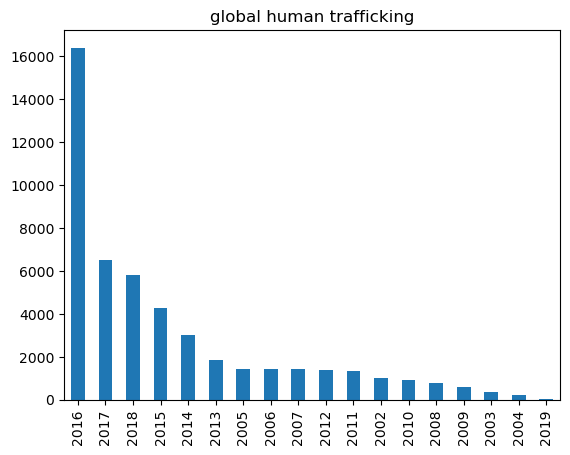

In [207]:
plot = data['yearofregistration'].value_counts().plot(kind='bar',
                                            title='global human trafficking')

From 2004 until 2016 the cases have considerably increased, we are talking that the world started with hundred of reported cases and on 2016 were over 10K of cases.

So, just let me invite you to continue listening about the variables analysis results and at the end of presentation we can discuss more about the measures to take tobe better on this subject.

# Gender

Are women the only victims of human trafficking?

Data shows, men are also victims of HT. 13.250 men have been victims of human trafficking.


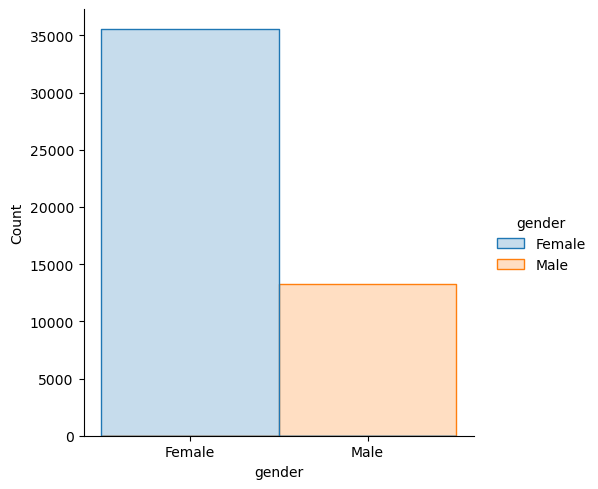

In [155]:
sns.displot(data, x="gender", hue="gender", element="step")

# Which are the age range on risk to be trafficked?

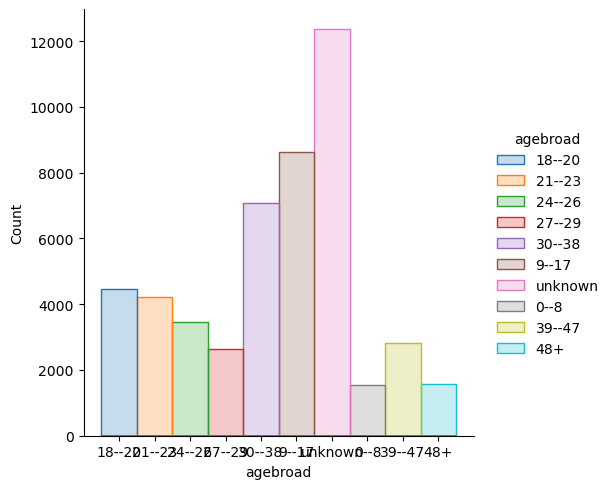

In [156]:
import seaborn.objects as so
sns.displot(data, x="agebroad", hue="agebroad", element="step")

As we can see the minors are the highest percentage of people recruited for human trafficking. Unknown data is related to cases managed as confidential and all the info has not been provided.

# isorganremoval
is there any relationship between the organ removal and the human trafficking?

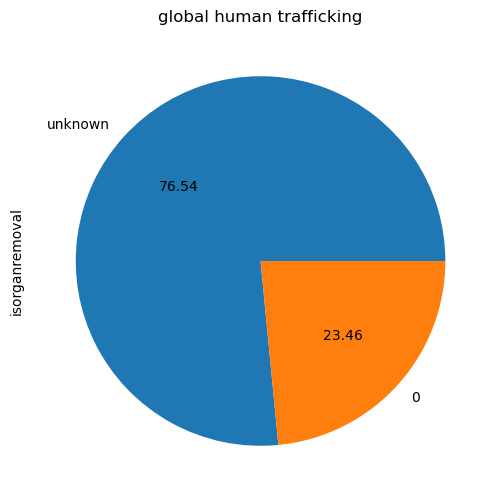

In [157]:
plot = data['isorganremoval'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='global human trafficking')

Keep in mind that unknown means cases that have been managed as confidential due to the risks and dangers of this subject.
As we see the 77% of attended cases is treated with prudence.
So, yes, there is a relevant relation.


# isabduction  

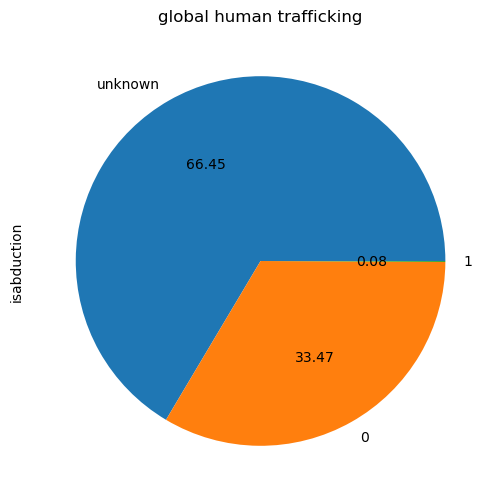

In [158]:
plot = data['isabduction'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='global human trafficking')

The 68% of abduction asisted cases are related to human trafficking. Both features isaduction and isorganremoval have been known through testimonies of the victims via email, call or remote assistance.

# Recruiterrelationship

In DR, we have an idiomatic expression that says, "who can introduce you to a problem are your closest people". 
After this analysis I'm going to say to this expression it depends! 
As the pie shows it is true the people closer to the victims were responsible in 11% of their recruitment.
But it is still a cause of concern that 63% of the cases couldn't be assigned to a classification due to the victims not providing this information.
The rest 18% wasn't able to be specified.


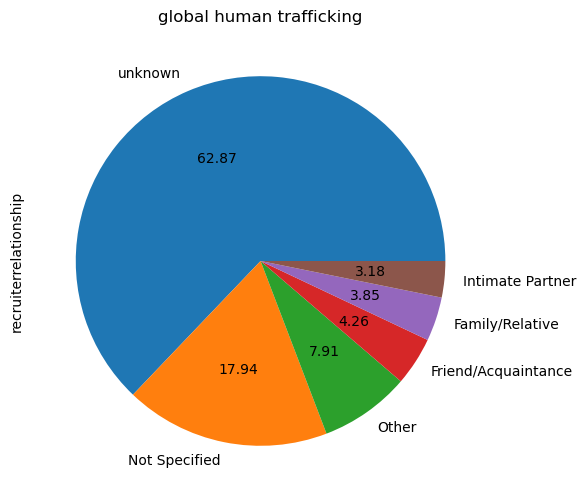

In [159]:
plot = data['recruiterrelationship'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='global human trafficking')

# Recruiterrelationunknown

Is there a high percentage of confidentiality about the collection of the data? Could we maybe say that the victims are under a high control level by this industry? Let's see!

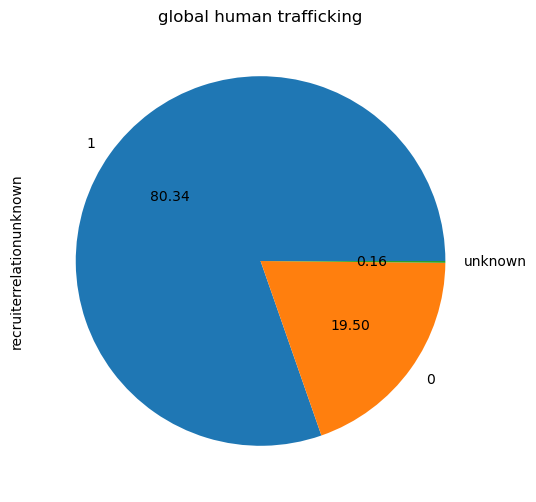

In [160]:
plot = data['recruiterrelationunknown'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='global human trafficking')

The 80% of managed cases the information about the recruitment or introduction process of the victims in GHT,it wasn't able to know.
Due to the victims, the socialworker or the person who reports the case.

# typeofexploitconcatenated

What do you read on this graph? 
Is sexual exploitation the most frequent cause of human trafficking?
Is slavery a subject of the past?


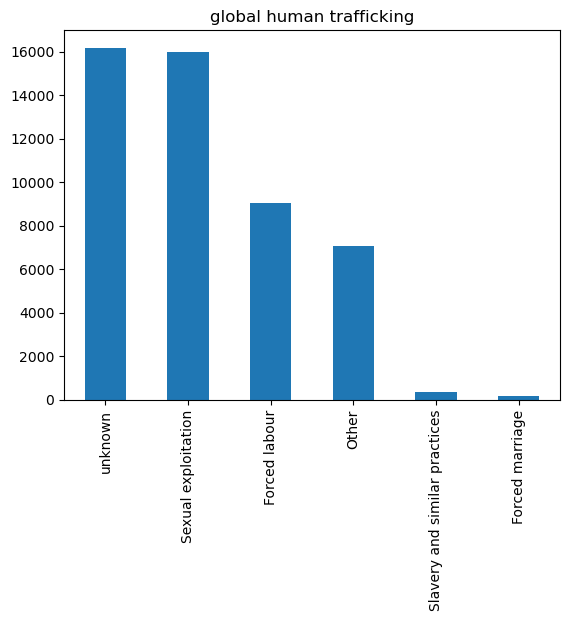

In [161]:
plot = data['typeofexploitconcatenated'].value_counts().plot(kind='bar',
                                            title='global human trafficking')

No, Slavery is growing but in modern ways. 
Unknown answers is on the top, follow by the sexual exploitation. On a 3rd place forced labour and others. You can be sure that sexual exploitation could be the highest one if we could confirm what unknown is.
So, what are your conclusions? is sexual exploitation the main cause of human trafficking? I say, yes, it is.


# typeofsexconcatenated

Are the prostitution and pornography results correct?

Unknown classification could be the key to know the correct answer.

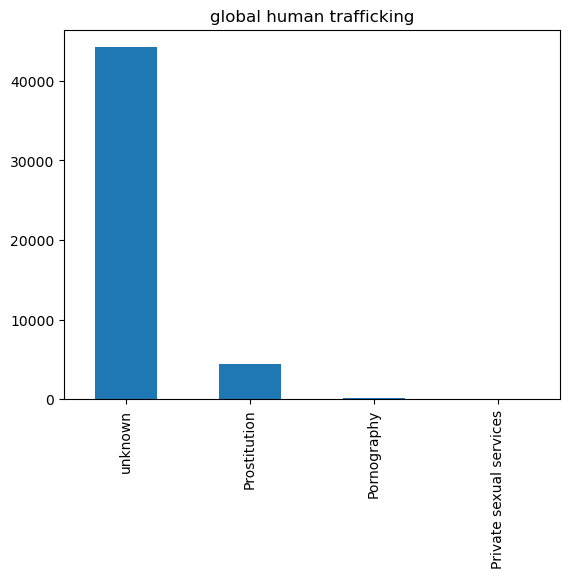

In [162]:
plot = data['typeofsexconcatenated'].value_counts().plot(kind='bar',
                                            title='global human trafficking')

# typeoflabourconcatenated

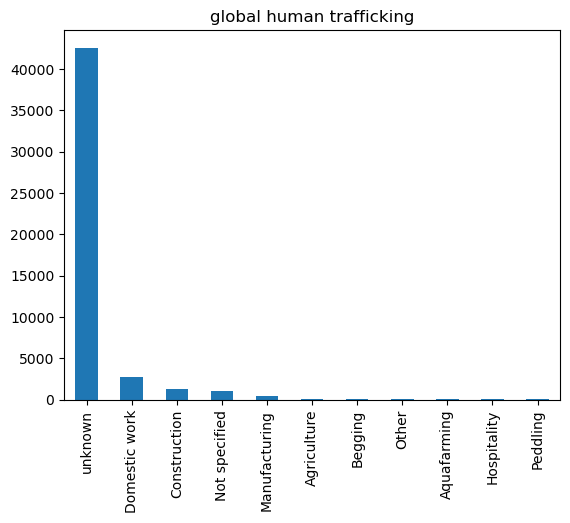

In [163]:
plot = data['typeoflabourconcatenated'].value_counts().plot(kind='bar',
                                            title='global human trafficking')

# meansofcontrolconcatenated

Which is/are the strategy used by the people who managed this activity?


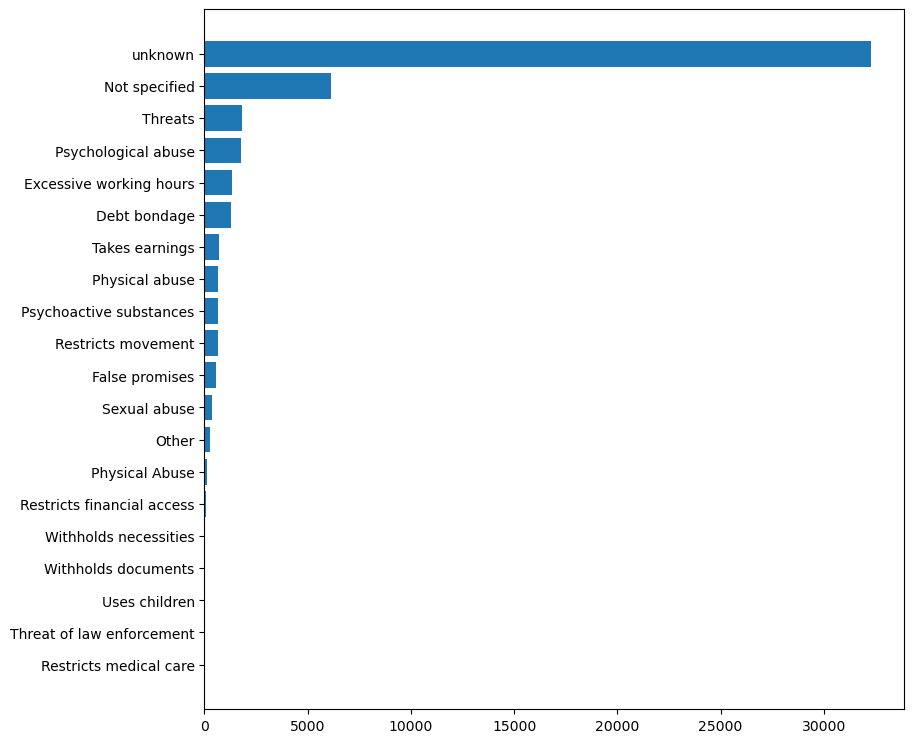

In [165]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
means_control = dict(data['meansofcontrolconcatenated'].value_counts())
ax.barh(list(means_control.keys()), means_control.values())
ax.invert_yaxis()
plt.show()

Manipulation, control and abuse are the keys, that's why to collect the information and create this dataset wasn't easy.
This is the first and only dataset that exists about this subject.

Due to the control there are so many confidencial cases classified as unknown.


In [166]:
import os.path
import pandas as pd

def readAllSheets(CTDC_synthetic_dict_20210825):
    if not os.path.isfile('CTDC_synthetic_dict_20210825.xlsx'):
        return None
    
    xlsx = pd.ExcelFile('CTDC_synthetic_dict_20210825.xlsx')
    sheets = xlsx.sheet_names

    results = {}

    for sheet in sheets:
        results[sheet] = xlsx.parse(sheet)
        
    xlsx.close()
    
    return results, sheets

In [167]:
data1= readAllSheets('CTDC_synthetic_dict_20210825.xlsx')
data1

({'Main':                                              position  \
  0                                                   1   
  1                                                   2   
  2                                                   3   
  3                                                   4   
  4                                                   5   
  5                                                   6   
  6                                                   7   
  7                                                   8   
  8                                                   9   
  9                                                  10   
  10                                                 11   
  11                                                 12   
  12                                                 13   
  13                                                 14   
  14                                                 15   
  15                                            

In [168]:
sheets=pd.read_excel('CTDC_synthetic_dict_20210825.xlsx', sheet_name='Region')

In [169]:
sheets

,ISO2,ISO3,Country,Countrydescription,UNRegion,UNSubRegion,IOMRegion
0,AD,AND,Andorra,Andorra,Europe,Southern Europe,RO Brussels
1,AE,ARE,United Arab Emirates,United Arab Emirates,Asia,Western Asia,RO Cairo
2,AF,AFG,Afghanistan,Afghanistan,Asia,Southern Asia,RO Bangkok
3,AG,ATG,Antigua and Barbuda,Antigua and Barbuda,Americas,Caribbean,RO San Jose
4,AI,AIA,Anguilla,Anguilla,Americas,Caribbean,RO San Jose
...,...,...,...,...,...,...,...
247,TP,NaN,NaN,Timor-Leste,NaN,NaN,NaN
248,Y2,NaN,NaN,Montenegro,NaN,NaN,NaN
249,Y3,NaN,NaN,"Serbia, Province of Serbia and Montenegro",NaN,NaN,NaN
250,YU,NaN,NaN,Serbia and Montenegro,NaN,NaN,NaN


In [170]:
sheets.rename(columns={'ISO2':'countryofexploitation'}, inplace =True)


In [171]:
sheets

,countryofexploitation,ISO3,Country,Countrydescription,UNRegion,UNSubRegion,IOMRegion
0,AD,AND,Andorra,Andorra,Europe,Southern Europe,RO Brussels
1,AE,ARE,United Arab Emirates,United Arab Emirates,Asia,Western Asia,RO Cairo
2,AF,AFG,Afghanistan,Afghanistan,Asia,Southern Asia,RO Bangkok
3,AG,ATG,Antigua and Barbuda,Antigua and Barbuda,Americas,Caribbean,RO San Jose
4,AI,AIA,Anguilla,Anguilla,Americas,Caribbean,RO San Jose
...,...,...,...,...,...,...,...
247,TP,NaN,NaN,Timor-Leste,NaN,NaN,NaN
248,Y2,NaN,NaN,Montenegro,NaN,NaN,NaN
249,Y3,NaN,NaN,"Serbia, Province of Serbia and Montenegro",NaN,NaN,NaN
250,YU,NaN,NaN,Serbia and Montenegro,NaN,NaN,NaN


In [172]:
cols = []
for i in range(len(sheets.columns)):
    cols.append(sheets.columns[i].lower().replace(' ', '_'))
sheets.columns = cols

sheets

,countryofexploitation,iso3,country,countrydescription,unregion,unsubregion,iomregion
0,AD,AND,Andorra,Andorra,Europe,Southern Europe,RO Brussels
1,AE,ARE,United Arab Emirates,United Arab Emirates,Asia,Western Asia,RO Cairo
2,AF,AFG,Afghanistan,Afghanistan,Asia,Southern Asia,RO Bangkok
3,AG,ATG,Antigua and Barbuda,Antigua and Barbuda,Americas,Caribbean,RO San Jose
4,AI,AIA,Anguilla,Anguilla,Americas,Caribbean,RO San Jose
...,...,...,...,...,...,...,...
247,TP,NaN,NaN,Timor-Leste,NaN,NaN,NaN
248,Y2,NaN,NaN,Montenegro,NaN,NaN,NaN
249,Y3,NaN,NaN,"Serbia, Province of Serbia and Montenegro",NaN,NaN,NaN
250,YU,NaN,NaN,Serbia and Montenegro,NaN,NaN,NaN


In [173]:
sheets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countryofexploitation  251 non-null    object
 1   iso3                   244 non-null    object
 2   country                246 non-null    object
 3   countrydescription     249 non-null    object
 4   unregion               237 non-null    object
 5   unsubregion            237 non-null    object
 6   iomregion              236 non-null    object
dtypes: object(7)
memory usage: 13.9+ KB


In [174]:
sheets.isna().sum()

countryofexploitation     1
iso3                      8
country                   6
countrydescription        3
unregion                 15
unsubregion              15
iomregion                16
dtype: int64

In [175]:
sheets['countryofexploitation'].fillna(sheets['countryofexploitation'].mode()[0], inplace=True)

In [176]:
sheets['iso3'].fillna(sheets['iso3'].mode()[0], inplace=True)

In [177]:
sheets['country'].fillna(sheets['country'].mode()[0], inplace=True)

In [178]:
sheets['countrydescription'].fillna(sheets['countrydescription'].mode()[0], inplace=True)

In [179]:
sheets['unregion'].fillna(sheets['unregion'].mode()[0], inplace=True)

In [180]:
sheets['unsubregion'].fillna(sheets['unsubregion'].mode()[0], inplace=True)

In [181]:
sheets['iomregion'].fillna(sheets['iomregion'].mode()[0], inplace=True)

In [182]:
sheets.isna().sum()

countryofexploitation    0
iso3                     0
country                  0
countrydescription       0
unregion                 0
unsubregion              0
iomregion                0
dtype: int64

In [183]:
sheets.isnull().sum()

countryofexploitation    0
iso3                     0
country                  0
countrydescription       0
unregion                 0
unsubregion              0
iomregion                0
dtype: int64

In [184]:
sheets

,countryofexploitation,iso3,country,countrydescription,unregion,unsubregion,iomregion
0,AD,AND,Andorra,Andorra,Europe,Southern Europe,RO Brussels
1,AE,ARE,United Arab Emirates,United Arab Emirates,Asia,Western Asia,RO Cairo
2,AF,AFG,Afghanistan,Afghanistan,Asia,Southern Asia,RO Bangkok
3,AG,ATG,Antigua and Barbuda,Antigua and Barbuda,Americas,Caribbean,RO San Jose
4,AI,AIA,Anguilla,Anguilla,Americas,Caribbean,RO San Jose
...,...,...,...,...,...,...,...
247,TP,CHN,Afghanistan,Timor-Leste,Africa,Caribbean,RO Bangkok
248,Y2,CHN,Afghanistan,Montenegro,Africa,Caribbean,RO Bangkok
249,Y3,CHN,Afghanistan,"Serbia, Province of Serbia and Montenegro",Africa,Caribbean,RO Bangkok
250,YU,CHN,Afghanistan,Serbia and Montenegro,Africa,Caribbean,RO Bangkok


In [ ]:
# X_test['ISO2'].unique()

In [ ]:
# X_train['ISO2'] =X_train['ISO2'].map({'NU':1 , 'AM':1, 'KG':1, 'PH':1, 'KN':1, 'RE':1, 'SM':1,'VI':1,'AQ':1,'BT':1,'EC':1,
#        'TN':1, 'UG':1, 'NG':1, 'FJ':1, 'MT':1, 'SJ':1, 'AZ':1, 'IO':1, 'BJ':1, 'GS':1, 'BE':1,
#        'KR':1, 'LI':1, 'BY':1, 'YT':1, 'RU':1, 'TO':1, 'AR':1, 'NO':1, 'ML':1, 'HU':1, 'LK':1,
# #        'GN':1, 'TH':1, 'BM':1, 'JP':1, 'BD':1, 'SV':1, 'QA':1, 'FI':1, 'MA':1, 'NC':1, 'MO':1,
#        'CN':1, 'PS':1, 'BA':1, 'ET':1, 'MN':1, 'PM':1, 'CF':1})

In [ ]:
# X_test['ISO2'] =X_test['ISO2'].map({'NU':1 , 'AM':1, 'KG':1, 'PH':1, 'KN':1, 'RE':1, 'SM':1,'VI':1,'AQ':1,'BT':1,'EC':1,
#        'TN':1, 'UG':1, 'NG':1, 'FJ':1, 'MT':1, 'SJ':1, 'AZ':1, 'IO':1, 'BJ':1, 'GS':1, 'BE':1,
#        'KR':1, 'LI':1, 'BY':1, 'YT':1, 'RU':1, 'TO':1, 'AR':1, 'NO':1, 'ML':1, 'HU':1, 'LK':1,
#        'GN':1, 'TH':1, 'BM':1, 'JP':1, 'BD':1, 'SV':1, 'QA':1, 'FI':1, 'MA':1, 'NC':1, 'MO':1,
#        'CN':1, 'PS':1, 'BA':1, 'ET':1, 'MN':1, 'PM':1, 'CF':1})

In [185]:
unique_counts = sheets['countryofexploitation'].value_counts()
unique_counts

AD    2
PK    1
NI    1
NL    1
NO    1
     ..
GU    1
GW    1
GY    1
HK    1
ZR    1
Name: countryofexploitation, Length: 251, dtype: int64

In [186]:
unique_counts = sheets['iso3'].value_counts()
unique_counts

CHN    10
SRB     2
NAM     1
NER     1
NFK     1
       ..
SGS     1
GTM     1
GUM     1
GNB     1
ZWE     1
Name: iso3, Length: 242, dtype: int64

In [187]:
unique_counts = sheets['country'].value_counts()
unique_counts

Afghanistan         7
Andorra             1
French Polynesia    1
Niger               1
Norfolk Island      1
                   ..
Guatemala           1
Guam                1
Guinea-Bissau       1
Guyana              1
Zimbabwe            1
Name: country, Length: 246, dtype: int64

In [188]:
unique_counts = sheets['countrydescription'].value_counts()
unique_counts

Montenegro                                      5
Timor-Leste                                     2
Andorra                                         1
French Polynesia                                1
Nigeria                                         1
                                               ..
South Georgia and the South Sandwich Islands    1
Guatemala                                       1
Guam                                            1
Guinea-Bissau                                   1
Zaire                                           1
Name: countrydescription, Length: 247, dtype: int64

In [189]:
unique_counts = sheets['unregion'].value_counts()
unique_counts

Africa      73
Americas    54
Asia        51
Europe      49
Oceania     25
Name: unregion, dtype: int64

In [190]:
unique_counts = sheets['unsubregion'].value_counts()
unique_counts

Caribbean                    42
Eastern Africa               20
Western Asia                 18
Western Africa               17
Southern Europe              17
South America                14
Northern Europe              12
Eastern Europe               11
South-Eastern Asia           11
Polynesia                    10
Middle Africa                 9
Southern Asia                 9
Western Europe                9
Central America               8
Eastern Asia                  8
Northern Africa               7
Micronesia                    7
Northern America              5
Southern Africa               5
Melanesia                     5
Central Asia                  5
Australia and New Zealand     3
Name: unsubregion, dtype: int64

In [191]:
unique_counts = sheets['iomregion'].value_counts()
unique_counts

RO Bangkok         70
RO San Jose        42
RO Brussels        40
RO Dakar           23
RO Vienna          20
RO Cairo           19
RO Pretoria        16
RO Buenos Aires    11
RO Nairobi         11
Name: iomregion, dtype: int64

In [192]:
y = sheets['country']
X = sheets.drop(['country'], axis=1)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(201, 6)
(51, 6)
(201,)
(51,)


In [195]:
df1= pd.merge(data, sheets, how='left', on='countryofexploitation') 

In [196]:
df1

,yearofregistration,gender,agebroad,majoritystatus,majorityentry,citizenship,meansofcontroldebtbondage,meansofcontroltakesearnings,meansofcontrolrestrictsfinancialaccess,meansofcontrolthreats,...,isabduction,recruiterrelationship,countryofexploitation,recruiterrelationunknown,iso3,country,countrydescription,unregion,unsubregion,iomregion
0,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi
48797,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi
48798,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi
48799,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi


In [197]:
df1.isna().sum()

yearofregistration                            0
gender                                        0
agebroad                                      0
majoritystatus                                0
majorityentry                                 0
citizenship                                   0
meansofcontroldebtbondage                     0
meansofcontroltakesearnings                   0
meansofcontrolrestrictsfinancialaccess        0
meansofcontrolthreats                         0
meansofcontrolpsychologicalabuse              0
meansofcontrolphysicalabuse                   0
meansofcontrolsexualabuse                     0
meansofcontrolfalsepromises                   0
meansofcontrolpsychoactivesubstances          0
meansofcontrolrestrictsmovement               0
meansofcontrolrestrictsmedicalcare            0
meansofcontrolexcessiveworkinghours           0
meansofcontroluseschildren                    0
meansofcontrolthreatoflawenforcement          0
meansofcontrolwithholdsnecessities      

In [198]:
df1.replace('np.NAN','unknown', inplace=True)
df1.replace('np.NAN', 'unknown', inplace=True)

In [199]:
df1

,yearofregistration,gender,agebroad,majoritystatus,majorityentry,citizenship,meansofcontroldebtbondage,meansofcontroltakesearnings,meansofcontrolrestrictsfinancialaccess,meansofcontrolthreats,...,isabduction,recruiterrelationship,countryofexploitation,recruiterrelationunknown,iso3,country,countrydescription,unregion,unsubregion,iomregion
0,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,Female,18--20,Adult,unknown,CO,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi
48797,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi
48798,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi
48799,2019,Female,unknown,unknown,unknown,UG,0,0,0,0,...,0,unknown,UG,unknown,UGA,Uganda,Uganda,Africa,Eastern Africa,RO Nairobi


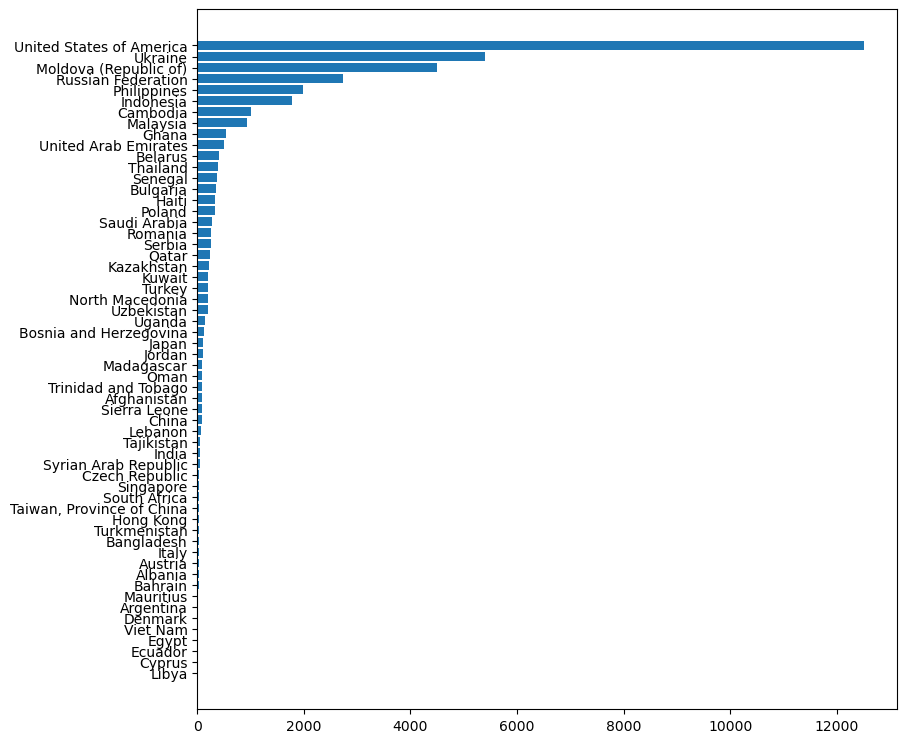

In [200]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
citi = dict(df1['country'].value_counts())
ax.barh(list(citi.keys()), citi.values())
ax.invert_yaxis()
plt.show()

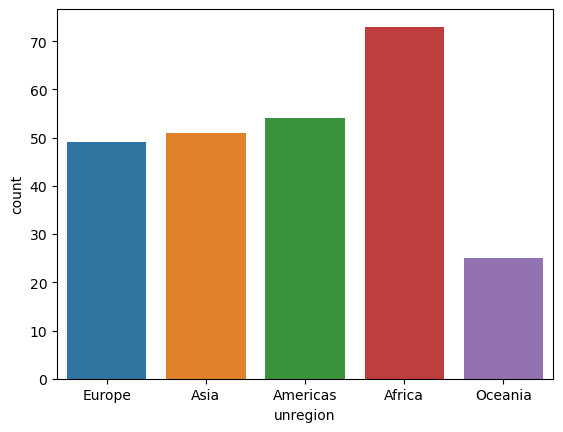

In [201]:
sns.countplot(x=sheets['unregion'])
plt.show()
   

<Axes: xlabel='citizenship', ylabel='Count'>

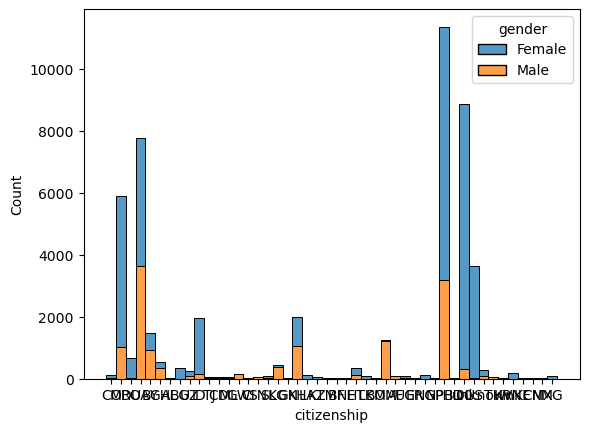

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="citizenship", hue="gender", data=data, stat="count", multiple="stack")

In [ ]:
data.to_csv('data_vers2.csv')

In [ ]:
sheets.to_excel('sheets_vers2.xlsx')

In [ ]:
df1.to_excel('df1_vers2.xlsx')

https://www.analyticslane.com/2021/03/15/truco-python-importar-todas-las-hojas-de-un-libro-excel-con-pandas/

https://seaborn.pydata.org/generated/seaborn.objects.Bar.html

https://seaborn.pydata.org/tutorial/categorical.html